# OCR - Optical Character Recognition
This is a demo of one or multiple OCR technologies from simple to possibly a bit harder to implement. Data should be put into the "data" subdirectory and from there all kinds of images will be loaded and processed.

In the first step we will be taking a look at EasyOCR for a simple to use and possibly lightweight setup.

## EasyOCR
EasyOCR (https://github.com/JaidedAI/EasyOCR) is a ready to use OCR framework with a bunch of supported languages and file types for typed text. It is available under Apache 2.0 License.

In [16]:
# Install
!pip3 install torch torchvision torchaudio opencv-python wget -q
!pip install torch-directml -q
!pip install easyocr -q
!pip install pandas -q
!pip install matplotlib -q


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install opencv-python --upgrade


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install torch-directml -q


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
import torch_directml

dml = torch_directml.device()
dml

device(type='privateuseone', index=0)

In [6]:
# import and load reader
import easyocr

easyocr_reader = easyocr.Reader(lang_list=["de", "en"]) # Read german and english text

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [14]:
import os

directory = "data"
file_data = []


for filename in os.listdir(directory):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        result = easyocr_reader.readtext(directory + "/" + filename, decoder="beamsearch", rotation_info=[15, -15], batch_size=8)
        file_data.append([filename, result])

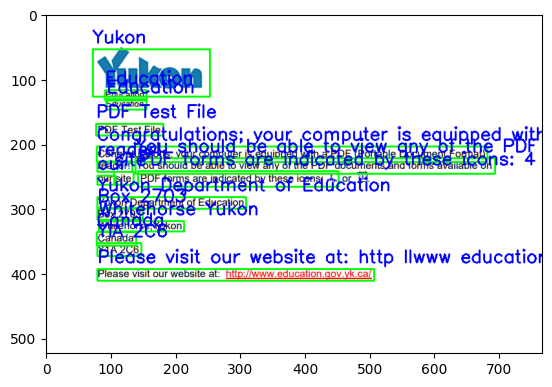

In [24]:
# Visualize results
import cv2
import matplotlib.pyplot as plt

for result in file_data:
    img = cv2.imread(directory + "/" + result[0])
    for entry in result[1]:
        box, text, confidence = entry
        
        # unpack the bounding box
        (tl, tr, br, bl) = box
        text_point = (int(tl[0]) * 2, int(tl[1]))
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        
        cv2.rectangle(img, tl, br, (0, 255, 0), 2)
        cv2.putText(img=img, text=text, org=text_point, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.9, color=(0,0,255), thickness=2)
    plt.imshow(img)
    cv2.imwrite("imoutput/" + result[0], img)

## PaddleOCR
PaddleOCR (https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.7/README_en.md) is a chinese open source OCR Tool for practical use and training of ocr models in over 80+ models, with a few more customization options than EasyOCR. It is also released under the Apache 2.0 License.

In [12]:
!pip install paddlepaddle -q

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
     --------------------------------------- 0.0/72.0 MB 262.6 kB/s eta 0:04:34
     --------------------------------------- 0.0/72.0 MB 262.6 kB/s eta 0:04:34
     --------------------------------------- 0.0/72.0 MB 178.6 kB/s eta 0:06:43
     --------------------------------------- 0.0/72.0 MB 178.6 kB/s eta 0:06:43
     --------------------------------------- 0.1/72.0 MB 218.8 kB/s eta 0:05:29
     --------------------------------------- 0.1/72.0 MB 218.8 kB/s eta 0:05:29
     --------------------------------------- 0.1/72.0 MB 187.3 kB/s eta 0:06:24
     --------------------------------------- 0.1/72.0 MB 209.5 kB/s eta 0:05:44
     --------------------------------------- 0.1/72.0 MB 218.3 kB/s eta 0:05:30
     --------------------------------------- 0.1/72.0 MB 225.3 kB/s eta 0:0


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!pip install "paddleocr>=2.0.1" -q

  Using cached paddleocr-2.7.0.3-py3-none-any.whl (465 kB)
  Using cached fonttools-4.45.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached premailer-3.10.0-py2.py3-none-any.whl (19 kB)
  Using cached pdf2docx-0.5.6-py3-none-any.whl (148 kB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached visualdl-2.5.3-py3-none-any.whl (6.3 MB)
  Using cached Cython-3.0.5-cp310-cp310-win_amd64.whl (2.8 MB)
  Using cached python_docx-1.1.0-py3-none-any.whl (239 kB)
  Using cached fire-0.5.0.tar.gz (88 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
  Using cached lxml-4.9.3-cp310-cp310-win_amd64.whl (3.8 MB)
  Using cached attrdict-2.0.1-py2.py3-none-any.whl (9.9 kB)
  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (

  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: fire is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

paddle_ocr = PaddleOCR(use_angle_cls=True, lang="german")

directory = "data"
paddle_file_data = []


for filename in os.listdir(directory):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        result = paddle_ocr.ocr(img=directory + "/" + filename, cls=True)
        paddle_file_data.append([filename, result])
        for idx in range(len(result)):
            res = result[idx]
            print(res)
        
paddle_file_data

for entry in paddle_file_data:
    result = entry[1][0]
    image = Image.open(directory + "/" + entry[0]).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/Roboto-Light.ttf')
    im_show = Image.fromarray(im_show)
    display(im_show)


ModuleNotFoundError: No module named 'paddleocr'